In [3]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Loading data

In [4]:
df = pd.read_csv('/Users/saurabh/Documents/PythonData/Melbourne_housing_FULL.csv')

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [5]:
df_new = df.dropna()

In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           8887 non-null object
Address          8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.5+ MB


In [29]:
df_new.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,...,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,...,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,4/06/2016,2.500,3067.000,...,1.000,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000
11,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,7/05/2016,2.500,3067.000,...,2.000,0.000,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000
14,Abbotsford,98 Charles St,2,h,1636000.000,S,Nelson,8/10/2016,2.500,3067.000,...,1.000,2.000,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,Northern Metropolitan,4019.000


In [30]:
df_new.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

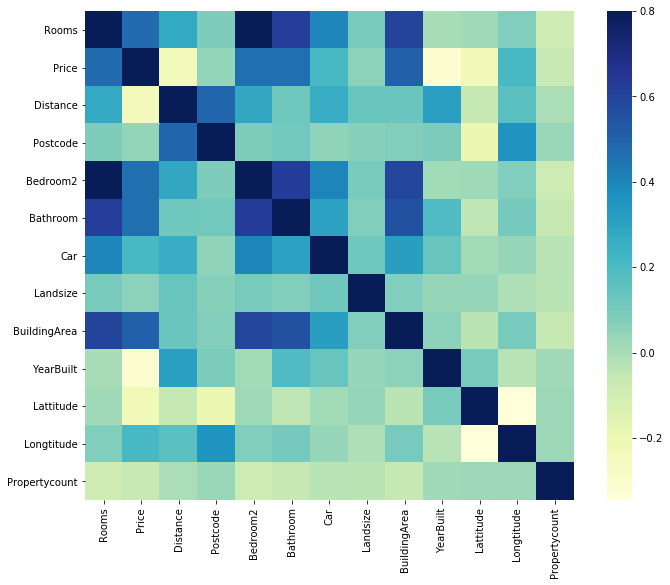

In [9]:
corrmat = df_new.corr()
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu")
plt.show()

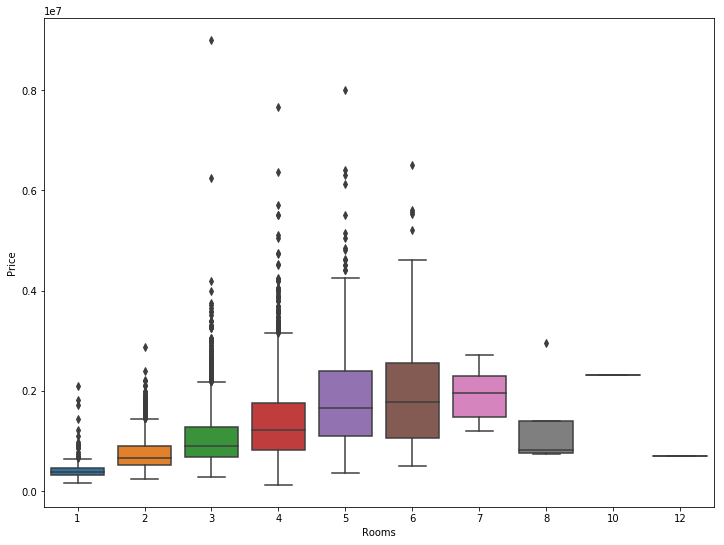

In [14]:
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.boxplot(x="Rooms", y="Price", data=df_new)

(0, 2500000)

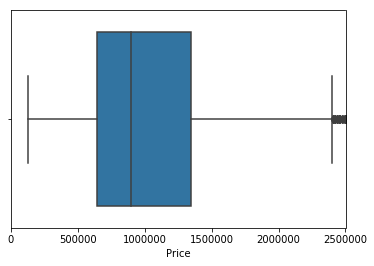

In [25]:
ax = sns.boxplot(x=df_new["Price"])
plt.xlim(0, 2500000)

In [31]:
categorical = df_new.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Suburb
315
Address
8764
Type
3
Method
5
SellerG
250
Date
77
CouncilArea
33
Regionname
8


In [6]:
# Removed outliers
df_new = df_new[df_new['Price'] < 2400000]

In [7]:
X = pd.get_dummies(df_new.drop(['Price','Suburb','Address','SellerG','Date','CouncilArea'], 1))
y = df_new['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,-37.808,...,0,0,0,0,1,0,0,0,0,0
4,3,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,-37.809,...,1,0,0,0,1,0,0,0,0,0
6,4,2.500,3067.000,3.000,1.000,2.000,120.000,142.000,2014.000,-37.807,...,0,1,0,0,1,0,0,0,0,0
11,3,2.500,3067.000,4.000,2.000,0.000,245.000,210.000,1910.000,-37.802,...,0,0,0,0,1,0,0,0,0,0
14,2,2.500,3067.000,2.000,1.000,2.000,256.000,107.000,1890.000,-37.806,...,0,0,0,0,1,0,0,0,0,0


### Linear Regression

In [19]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, y_test))

Coefficients: 
 [ 6.05447743e+04 -3.21728449e+04  2.31728419e+02  4.15903126e+04
  9.25960962e+04  3.10816907e+04  1.47294858e+01  1.43868256e+03
 -2.65384217e+03 -6.98302402e+05  4.70322188e+05  5.99674580e-01
  1.59307735e+05  3.24058014e+04 -1.91713536e+05 -3.20833782e+04
  3.58430262e+04 -4.88763774e+03  1.23022034e+04 -1.11742136e+04
 -1.63537095e+04 -1.33694293e+05 -1.28555571e+05  1.71347448e+05
 -6.23558582e+04  9.85873712e+04 -1.30568859e+05  2.01593471e+05]
Intercept: 
 -89521717.61616236

R-squared:
0.6782141046091126


### KNN

In [18]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)
score = cross_val_score(knn, X_train, y_train, cv=5)
print("weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

weighted Accuracy: 0.62 (+/- 0.05)


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
print('\nR-squared:')
print(regr.score(X_test, y_test))


R-squared:
0.47580728214265544


### Linear SVR

In [16]:
from sklearn.svm import LinearSVR
regr = LinearSVR(random_state=0)
regr.fit(X_train, y_train)
print('\nR-squared:')
print(regr.score(X_test, y_test))


R-squared:
0.18459755307404802


### Gradient Boost

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

print('\nR-squared:')
print(est.score(X_test, y_test))


R-squared:
0.7094691912336555


### XGBoost

In [14]:
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params)
grid.fit(X, y)

# Print the r2 score
print(r2_score(y_test, grid.best_estimator_.predict(X_test))) 

0.8781028876168963
